In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt


class FuzzyCMean:
    def __init__(self, iteration_num=100, k=5, m=2, file_name='data1.csv'):
        self.m = m
        self.k = k
        self.file_name = file_name
        self.iteration_num = iteration_num
        self.fuzz_data = np.genfromtxt(self.file_name, delimiter=',')
        self.u = None
        self.centroids = None
        self.cost = float('inf')

    def initial_centroids(self):
        self.centroids = np.array([
            np.array([random.uniform(min(self.fuzz_data[:, 0]), max(self.fuzz_data[:, 1])) for d in range(self.fuzz_data.shape[1])])
            for k in range(self.k)])

    def calculate_u(self):
        self.u = np.array([[1 / np.sum(
            [(np.linalg.norm(Xk - Vi) / np.linalg.norm(Xk - Vj)) ** (2 / (self.m - 1)) for Vj in self.centroids])
                            for Vi in self.centroids]
                           for Xk in self.fuzz_data])

    def update_centroids(self):
        self.centroids = np.array([
            np.add.reduce([
                (self.u[d, c] ** self.m) * self.fuzz_data[d] for d in range(len(self.fuzz_data))])
            / np.sum([dd[c] ** self.m for dd in self.u]) for c in range(len(self.centroids))])

    def cluster_stability(self):
        self.initial_centroids()
        for i in range(self.iteration_num):
            self.calculate_u()
            self.update_centroids()
            self.calculate_cost()

    def calculate_cost(self):
        self.cost = np.sum([
            np.sum([(self.u[j, i] ** self.m) * (np.linalg.norm(self.fuzz_data[j] - self.centroids[i]) ** 2)
                    for i in range(len(self.centroids))]) for j in range(len(self.fuzz_data))])

    def plot_scatter(self):
        for k in range(self.k):
            membership = []
            cluster = []
            for Xk in range(len(self.fuzz_data)):
                max_u = np.argmax(self.u[Xk])
                if max_u == k:
                    cluster.append(self.fuzz_data[Xk])
                    membership.append(self.u[Xk, k])
            cluster = np.array(cluster)
            membership = np.array(membership)
            plt.scatter(cluster[:, 0], cluster[:, 1], c=membership, cmap='summer')

        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='r', marker='x')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('{}, m={}'.format(self.file_name,self.m))
        plt.colorbar()
        plt.show()


def test_cost_for_k(dataset_name):
    print(dataset_name + ":")
    cost = []
    for k in range(1, 6):
        f1 = FuzzyCMean(k=k, file_name=dataset_name)
        f1.cluster_stability()
        cost.append(f1.cost)
    plt.plot([1, 2, 3, 4, 5], cost, c='m', marker='o')
    plt.title('Effect of changing K on Cost')
    plt.xlabel('K(Number of Clusters)')
    plt.ylabel('Cost')
    plt.show()



def test_cost_for_m(dataset_name):
    cost = []
    for m in range(2, 11):
        fuzz = FuzzyCMean(k=3, m=m, file_name='data1.csv')
        fuzz.cluster_stability()
        cost.append(fuzz.cost)
        fuzz.plot_scatter()
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], cost, c='b')
    plt.title(dataset_name)
    plt.xlabel('m')
    plt.ylabel('Cost')
    plt.show()

# Effect of changing K on Cost

<div dir='rtl' style='font-size: 150%; line-height: 125%;'>
   ابتدا الگوریتم CMeans را مطابق مراحل گفته شده پیاده‌سازی میکنیم و سپس آن را بر روی 4 دیتاستی که در اختیار داریم اجرا میکنیم.
سپس نمودار cost را به ازای k های مختلف از 1 تا 5 رسم میکنیم. مشاهده میکنیم که با افزایش k هزینه کاهش پیدا میکند چرا که تعداد مرکز خوشه ها بیشتر شده و فاصله‌ی داده‌ها از این مراکز کاهش پیدا میکند. 
همچنین برای هر یک از این چهار نمودار elbow را تعیین میکنیم. elbow نقطه‌ای است که از آنجا به بعد میزان هزینه کاهش چشمگیری پیدا نمیکند، بنابراین تعداد خوشه‌ی بهینه را برای هر یک از این 4 دیتاست بر اساس روش elbow تعیین میکنیم.
تعداد خوشه‌های بهینه برای هر یک از دیتاست‌ها به شرح زیر میباشد:
</div>


Dataset Name | Elbow 
:-----------:|:-----------:
dataset1.csv | k = 3     
dataset2.csv | k = 2
dataset3.csv | k = 3     
dataset4.csv | k = 2

data1.csv:


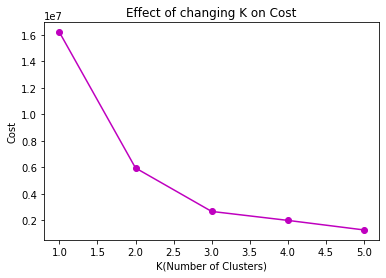

data2.csv:


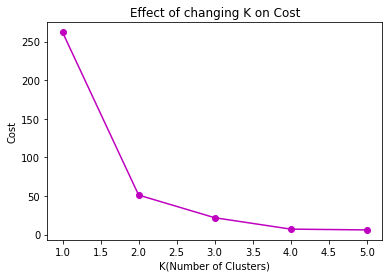

data3.csv:


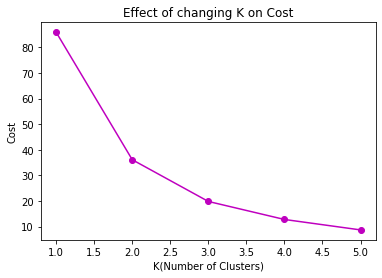

data4.csv:


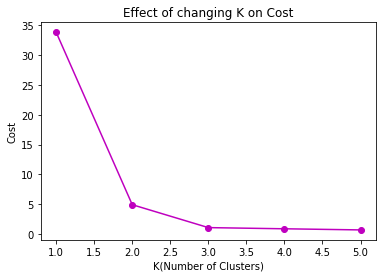

In [5]:
test_cost_for_k('data1.csv')
test_cost_for_k('data2.csv')
test_cost_for_k('data3.csv')
test_cost_for_k('data4.csv')

# Effect of changing m on Cost


<div dir='rtl' style='font-size: 150%; line-height: 125%;'>
 با ثابت نگه داشتن k=3 (تعداد خوشه‌ها)، پارامتر m را تغییر میدهیم و تابع هزینه را به ازای m های متفاوت از 2 تا 10 (m باید بزرگتر از 1 باشد)محاسبه میکنیم. مشاهده میشود که با بزرگتر شدن m هزینه کاهش پیدا میکند. همچنین هر چه m بزرگتر میشود، داده‌های هر خوشه متمرکزتر میشوند و همچنین مرز بین خوشه‌ها محو میشود.
</div>


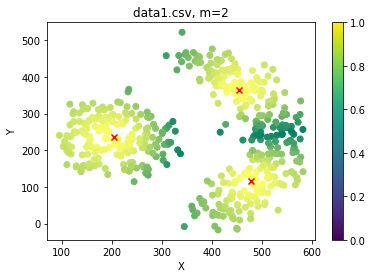

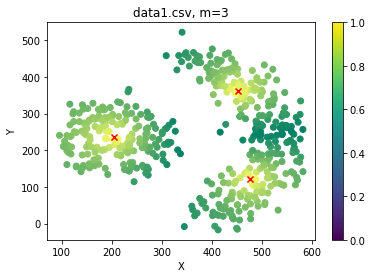

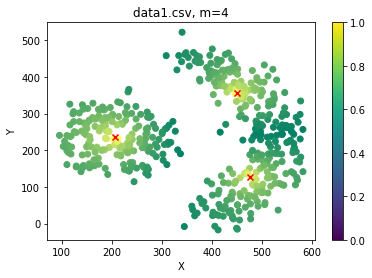

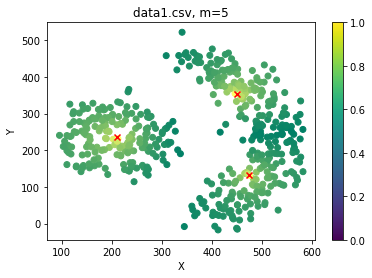

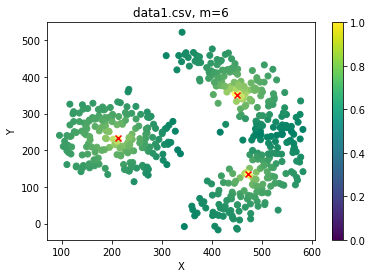

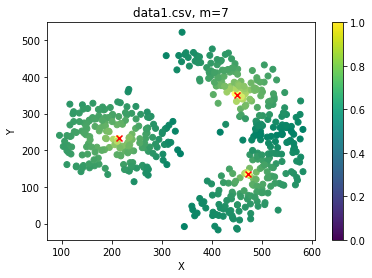

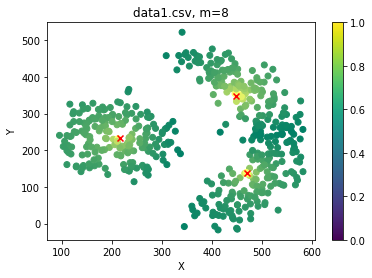

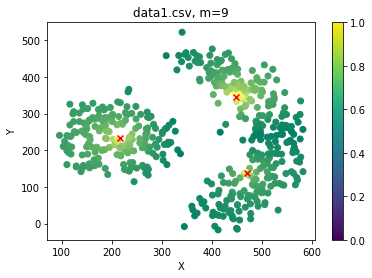

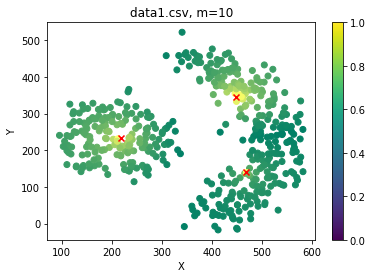

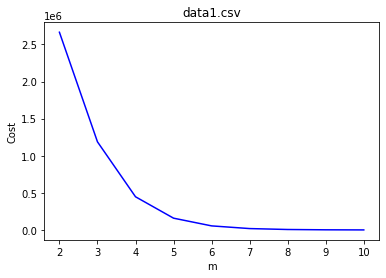

In [7]:
test_cost_for_m('data1.csv')

# Data Scattering Plot with 5 Centroids

<div dir='rtl' style='font-size: 150%; line-height: 125%;'>
   در این بخش داده‌های دوبعدی دیتاست را(از بین دیتاست‌های داده شده، دیتاست‌های 1 و 3 دو‌‌ بعدی هستند)رسم کنیم. از آنجایی که با مجموعه‌ای فازی سر و کار داریم، نمیشود گفت داده‌ها تنها به یک خوشه‌ی خاص تعلق دارند. بنابراین میزان تعلق هر داده را به تمام خوشه‌ها تعیین میکنیم و هر داده در نهایت در خوشه‌ای جا میگیرد که به آن بیشترین میزان تعلق را نسبت به سایر خوشه‌‌ها داشته باشد.
در ابتدا داده‌های دیتاست 1 و سپس داده‌های دیتاست 3 به ازای k ها 1 تا 5 رسم شده‌اند.
</div>


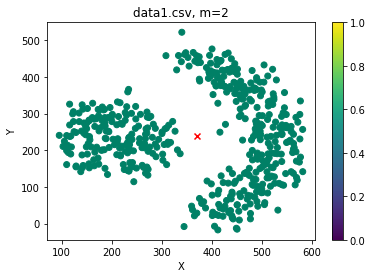

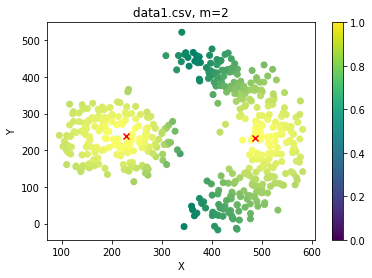

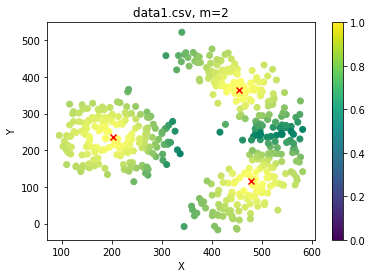

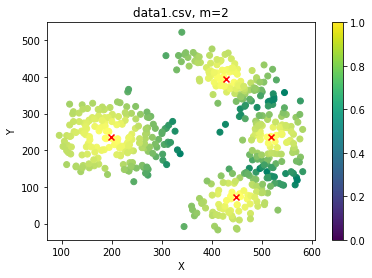

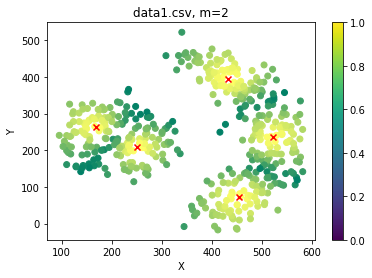

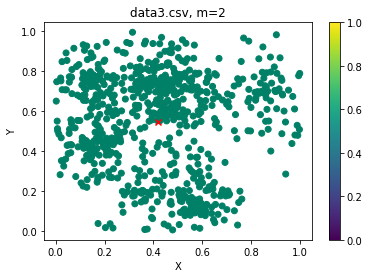

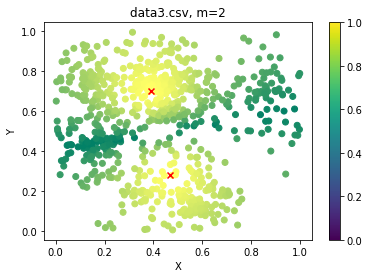

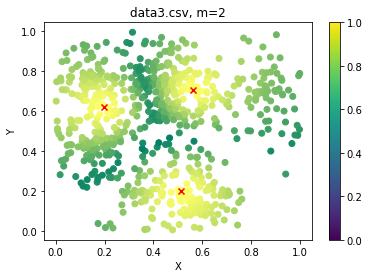

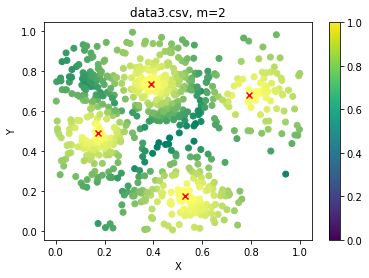

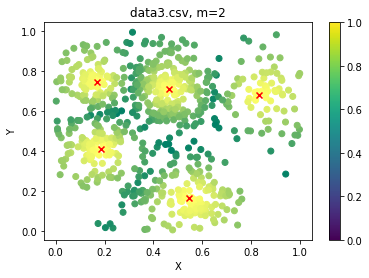

In [20]:
for i in range(1, 6):
    f1 = FuzzyCMean(k=i, file_name='data1.csv')
    f1.cluster_stability()
    f1.plot_scatter()

for i in range(1, 6):
    f1 = FuzzyCMean(k=i, file_name='data3.csv')
    f1.cluster_stability()
    f1.plot_scatter()